In [1]:
system("source activate sf_test")

In [2]:
library(ggplot2)
library(RColorBrewer)

In [3]:
vrs <- read.csv("/dors/capra_lab/users/fongsl/broadly_active_enhancers/baes_data/villar_ref_data/vrs_for_R.csv", sep ='\t', h=T)

In [18]:
head(vrs)

v.chr,v.start,v.end,IDs,sum,X90_percentile,act_sp,aln_sp,hq_act_sp,hq_aln_sp,aln_inact,hq_aln_inact,length,percentile
chr20,270226,272388,hsaH3K27Ac23366,0,0,2,9,1,7,7,6,2162,0.02
chr10,126076962,126079574,hsaH3K27Ac5900,0,0,0,0,0,0,0,0,2612,0.02
chr10,123358043,123358739,hsaH3K27Ac5855,0,0,5,12,2,5,7,3,696,0.02
chr19,7981384,7983285,hsaH3K27Ac18766,0,0,2,9,2,6,7,4,1901,0.02
chr2,200319976,200321620,hsaH3K27Ac22657,0,0,3,15,2,8,12,6,1644,0.02
chr2,200932286,200934456,hsaH3K27Ac22666,0,0,3,7,2,6,4,4,2170,0.02


In [ ]:
summary(vrs)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


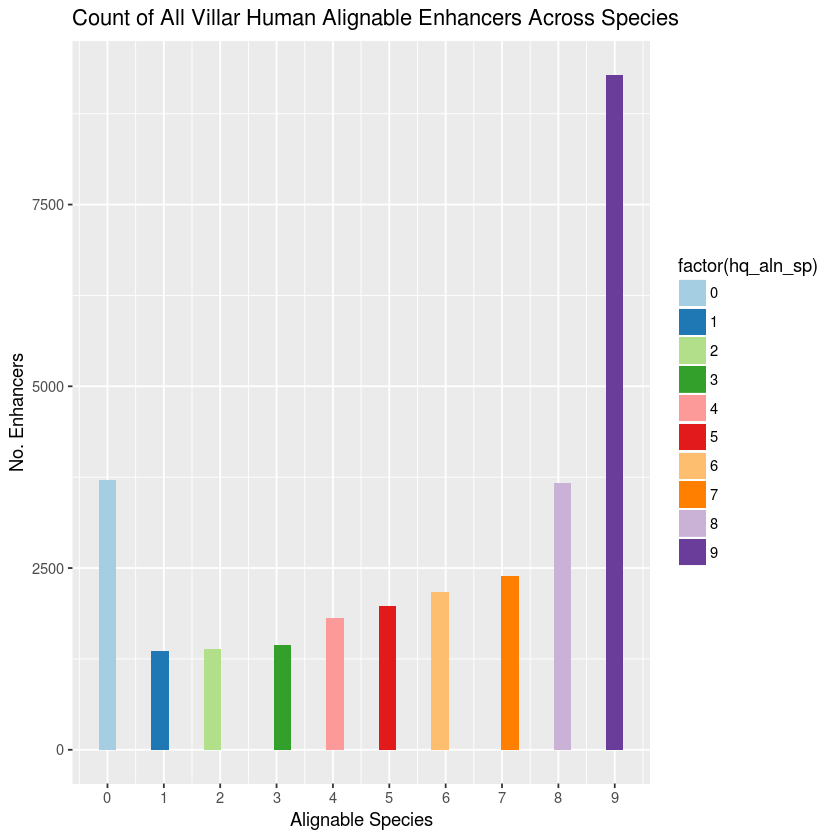

In [27]:
ggplot(vrs, aes(x =hq_aln_sp, fill=factor(hq_aln_sp))) +
  geom_histogram()+
    scale_x_continuous(breaks=seq(0,10,1))+
    ggtitle("Count of All Villar Human Alignable Enhancers Across Species")+
    labs(x = "Alignable Species", y = "No. Enhancers")+
scale_fill_brewer(palette="Paired")


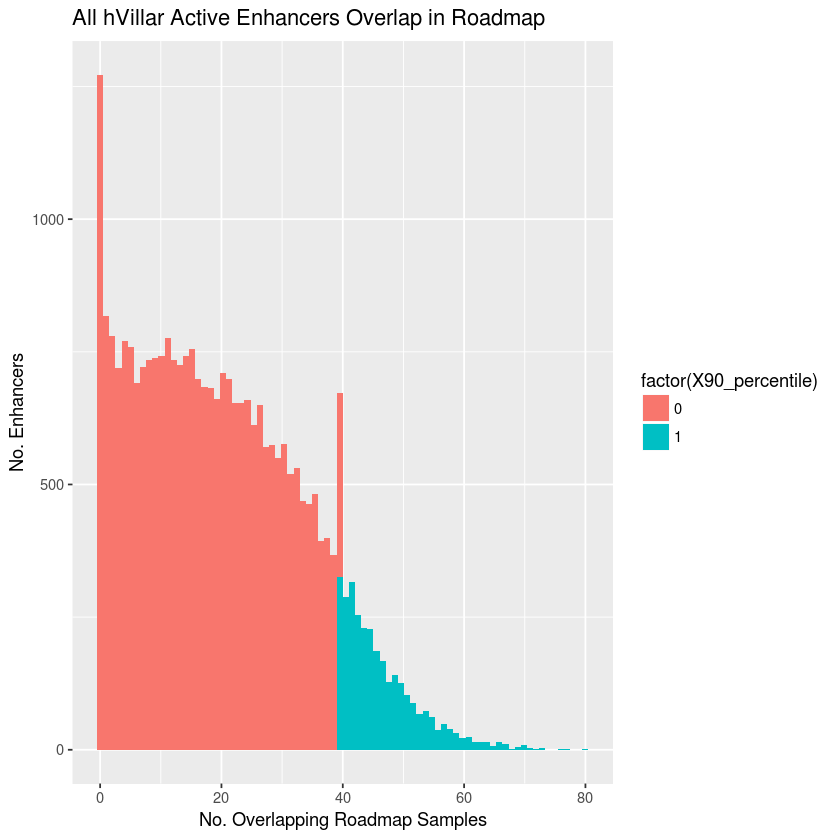

In [47]:
ggplot(vrs, aes(x =sum, group = sum, fill = factor(X90_percentile))) +
  geom_histogram(bins=80)+
  labs(y="No. Enhancers", x = "No. Overlapping Roadmap Samples")+
  ggtitle( "All hVillar Active Enhancers Overlap in Roadmap")

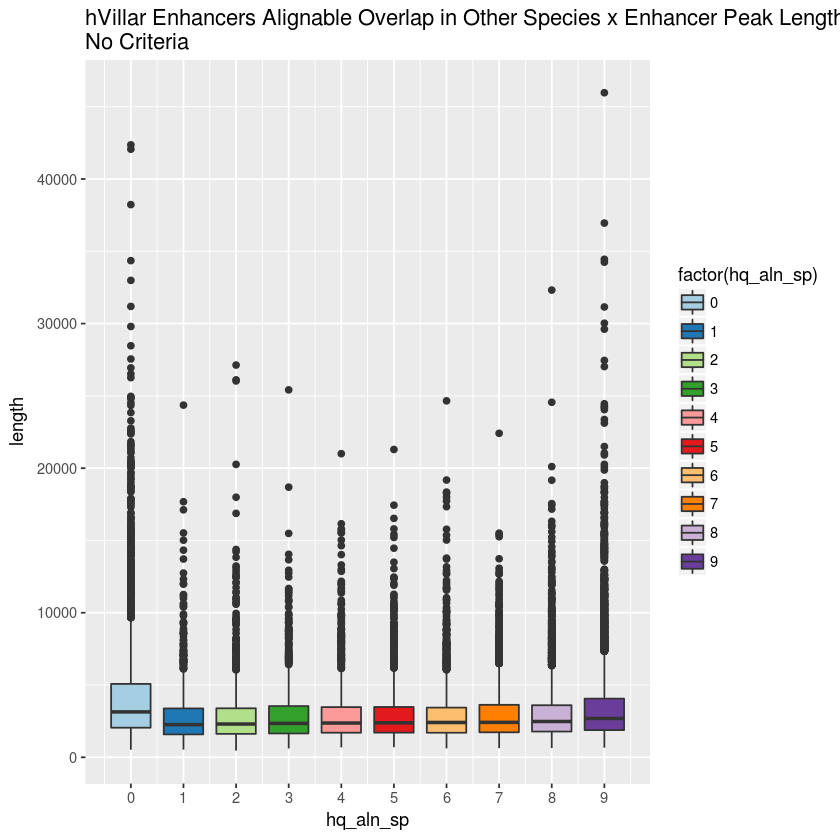

In [33]:
ggplot(vrs, aes(x =hq_aln_sp, y =length, group = hq_aln_sp, fill = factor(hq_aln_sp))) +
  geom_boxplot()+
    scale_x_continuous(breaks=seq(0,10,1))+
    ggtitle("hVillar Enhancers Alignable Overlap in Other Species x Enhancer Peak Length\nNo Criteria")+
       scale_fill_brewer(palette="Paired")


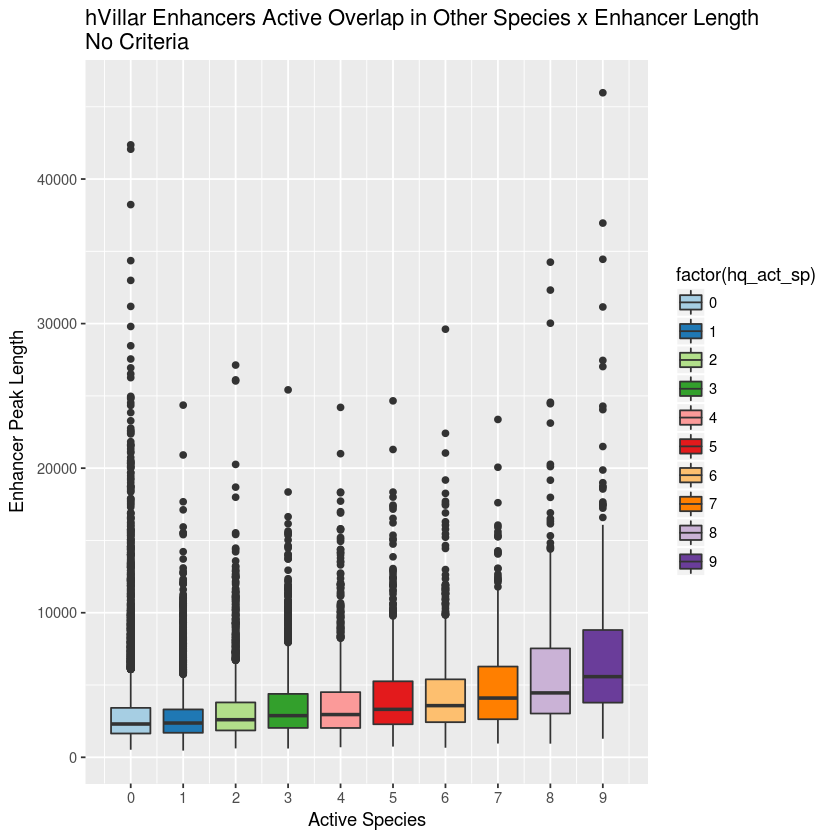

In [36]:
ggplot(vrs, aes(x =hq_act_sp, y =length, group = hq_act_sp, fill=factor(hq_act_sp))) +
  geom_boxplot()+
    scale_x_continuous(breaks=seq(0,10,1))+
    ggtitle("hVillar Enhancers Active Overlap in Other Species x Enhancer Length\nNo Criteria")+
    labs(x = "Active Species", y = "Enhancer Peak Length")+
    scale_fill_brewer(palette="Paired")



In [ ]:
ggplot(vrs, aes(x =sum, y =length, group = sum, fill = factor(sum))) +
  geom_boxplot()+
  labs(y="Peak length (nt)", x = "No. Overlapping Roadmap Samples")+
  ggtitle( "hVillar Active Enhancers Overlap in Roadmap x Enhancer Length\nNo Criteria")+
  labs(x = "Active Species", y = "Enhancer Peak Length")

In [42]:
# Recreate Alex's dataframe, observing only enhancers that are alignable in all 10 high-quality species.
fish<- subset(vrs, hq_aln_sp == max(vrs$hq_aln_sp))

cons_act<- subset(fish, hq_act_sp == max(fish$hq_act_sp))

print("FISH peaks alignable to all 10 species")

dim(fish)

print("FISH Conserved - ALIGNABLE + ACTIVE peaks across all 10 species")

dim(cons_act)

print("FISH Conserved - broad activity peak overlap")

summary(cons_act$sum)

[1] "FISH peaks alignable to all 10 species"


[1] 9285   14

[1] "FISH Conserved - ALIGNABLE + ACTIVE peaks across all 10 species"


[1] 336  14

[1] "FISH Conserved - broad activity peak overlap"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   10.00   24.00   25.06   38.00   80.00 

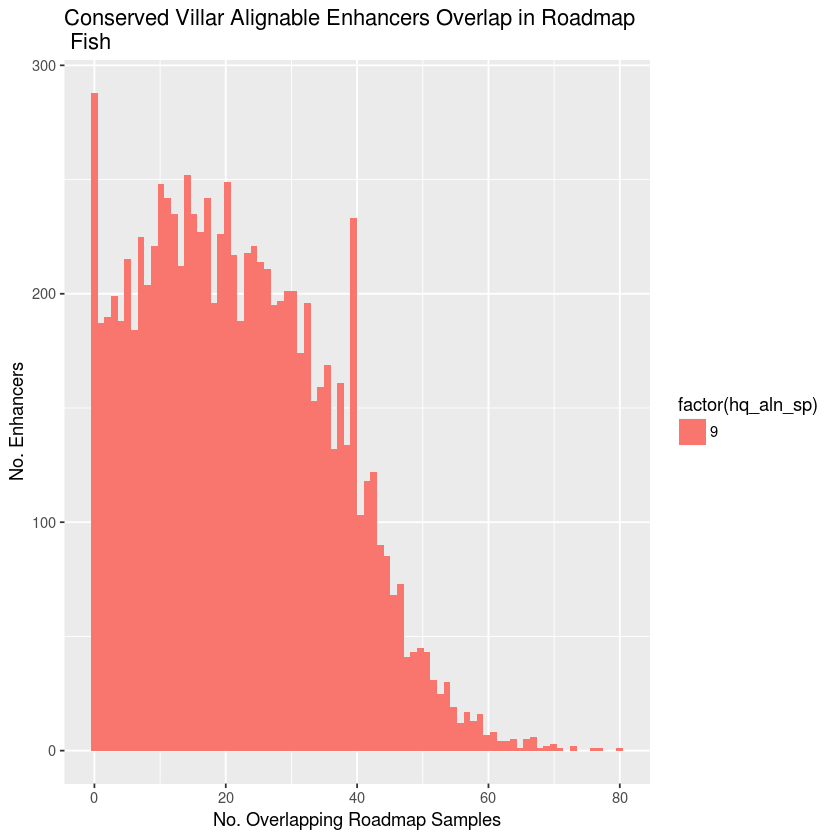

In [38]:
ggplot(fish, aes(x =sum, group = sum, fill = factor(hq_aln_sp))) +
  geom_histogram(bins=80)+
  labs(y="No. Enhancers", x = "No. Overlapping Roadmap Samples")+
  ggtitle( "Conserved Villar Alignable Enhancers Overlap in Roadmap\n Fish")

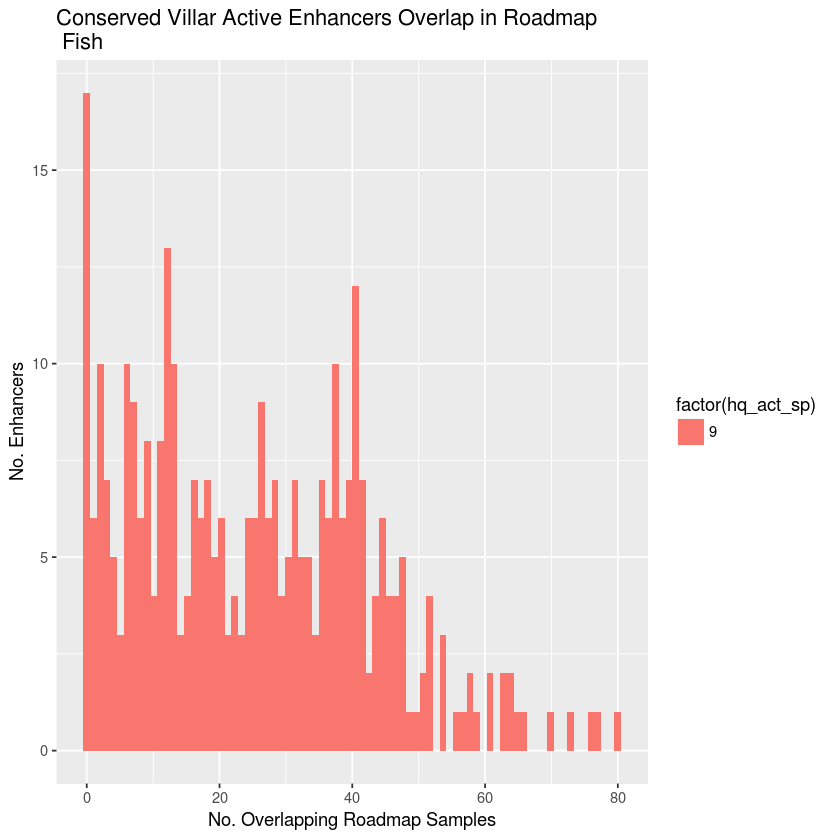

In [43]:
ggplot(cons_act, aes(x =sum, group = sum, fill = factor(hq_act_sp))) +
  geom_histogram(bins=80)+
  labs(y="No. Enhancers", x = "No. Overlapping Roadmap Samples")+
  ggtitle( "Conserved Villar Active Enhancers Overlap in Roadmap\n Fish")

In [ ]:
ggplot(fish, aes(x =sum, y =length, group = sum, fill = factor(sum))) +
  geom_boxplot()+
  labs(y="Enhancer Peak length (nt)", x = "No. Overlapping Roadmap Samples")+
  ggtitle("hVillar Active Enhancers Overlap in Roadmap x Enhancer Length\nFish - Conserved Enhancer Sequences Only")+
scale_fill_brewer(palette="Purples")

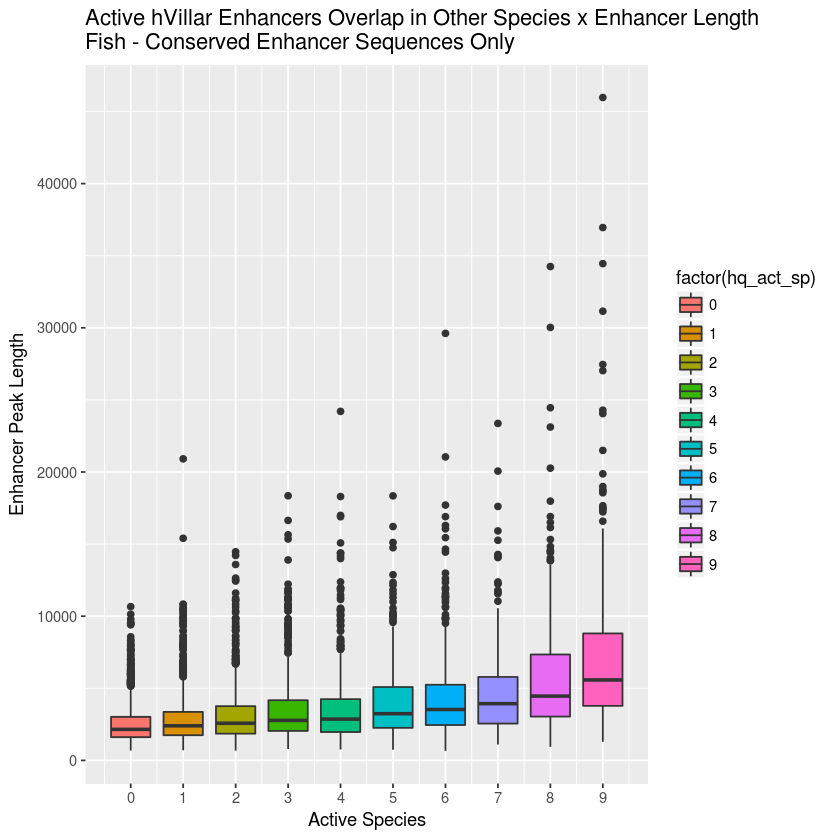

In [35]:
ggplot(fish, aes(x =hq_act_sp, y =length, group = hq_act_sp, fill=factor(hq_act_sp))) +
  geom_boxplot()+
    scale_x_continuous(breaks=seq(0,10,1))+
    ggtitle("Active hVillar Enhancers Overlap in Other Species x Enhancer Length\nFish - Conserved Enhancer Sequences Only")+
    labs(x = "Active Species", y = "Enhancer Peak Length")


In [11]:
# Create Human-only dataframe, observing only enhancers that are NOT alignable in all 10 high-quality species.
hspec<- subset(vrs, hq_aln_sp == min(vrs$hq_aln_sp))

print("enhancers alignable only to humans")
dim(hspec)

print("human-specific - length of active peak")
summary(hspec$length)

print("human-specific - roadmap sample overlap")
summary(hspec$sum)

hspec_bae<-subset(hspec, sum>=40)

print("human-specific - broadly active enhancers >=40 samples ")
dim(hspec_bae)

[1] "enhancers alignable only to humans"


[1] 3705   14

[1] "human-specific - length of active peak"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    523    2048    3138    4272    5076   42365 

[1] "human-specific - roadmap sample overlap"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   20.00   21.27   32.00   72.00 

[1] "human-specific - broadly active enhancers >=40 samples "


[1] 481  14

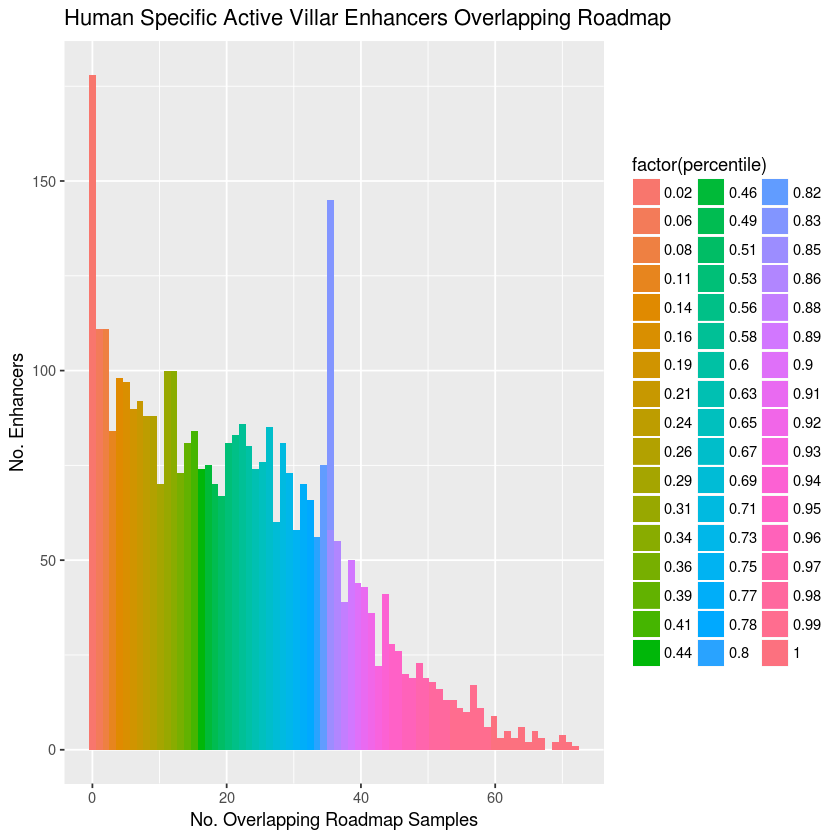

In [46]:
ggplot(hspec, aes(x =sum, group = sum, fill = factor(percentile))) +
  geom_histogram(bins = 72)+
  labs(y="No. Enhancers", x = "No. Overlapping Roadmap Samples")+
  ggtitle( "Human Specific Active Villar Enhancers Overlapping Roadmap")

In [ ]:
ahspec<- subset(vrs, hq_aln_sp > min(vrs$hq_aln_sp))

print("alignable >= 1 other alignable species")
dim(ahspec)

print("length of active peak >= 1 other alignable species")
summary(ahspec$length)

print("broad activity overlap peaks >= 1 other alignable species")
summary(ahspec$sum)

In [ ]:
#ggplot(fish, aes(x =length, y =sum, group = hq_act_sp, color = hq_act_sp)) + geom_point()

In [ ]:
ggplot(hspec, aes(x =sum, y =length, group = sum, fill = factor(sum))) +
  geom_boxplot()+ 
    scale_x_continuous(breaks=seq(0,80,20), limits = c(-1,81))+
  labs(y="Enhancer Peak length (nt)", x = "No. Overlapping Roadmap Samples")+
  ggtitle("hVillar Active Enhancers Overlap in Roadmap x Enhancer Length\nOnly Human-Alignable Criteria")+
scale_fill_brewer(palette="Spectral")